In [61]:
#ASSIGNMENT 1
#(i) Perform the required data pre-processing steps and clean your data.
# Essentially, drop unnecessary columns, deal with missing values marked
# with ‘-’ without losing essential data, and convert categorical data to
# numerical data

import pandas as pd
import numpy as np
import tensorflow as tf
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import SGD, RMSprop, Adadelta, Adam
import matplotlib.pyplot as plt
from keras.utils import to_categorical

In [62]:
df = pd.read_csv('Crystal_structure.csv')

df = df.drop(columns=['Compound', 'A', 'B', 'v(A)', 'v(B)', 'τ'])
df = df.replace('-', np.nan)
df.dropna(inplace = True)
df.fillna(0,inplace=True)

label_encoder = LabelEncoder()
df['In literature'] = df['In literature'].replace({False: 0, True: 1})
df['Lowest distortion'] = df['Lowest distortion'].replace({'cubic': 0, 'orthorhombic': 1,'tetragonal':2,'rhombohedral':3})

X = df.drop(columns=['Lowest distortion'])
y = df['Lowest distortion']

In [63]:
corr_matrix=df.corr()
print(corr_matrix)

                   In literature  r(AXII)(Å)  r(AVI)(Å)  r(BVI)(Å)     EN(A)  \
In literature           1.000000    0.183921   0.158147  -0.133536 -0.187528   
r(AXII)(Å)              0.183921    1.000000   0.937252  -0.002960 -0.625546   
r(AVI)(Å)               0.158147    0.937252   1.000000   0.006542 -0.625891   
r(BVI)(Å)              -0.133536   -0.002960   0.006542   1.000000 -0.001410   
EN(A)                  -0.187528   -0.625546  -0.625891  -0.001410  1.000000   
EN(B)                   0.046673    0.007865  -0.002091  -0.622841 -0.001036   
l(A-O)(Å)               0.113036    0.328624   0.258200  -0.003457 -0.109852   
l(B-O)(Å)              -0.018175   -0.001498   0.000092   0.271216  0.000730   
ΔENR                    0.013345   -0.462148  -0.448987  -0.843582  0.412299   
tG                      0.232619    0.800586   0.745971  -0.587377 -0.499126   
μ                      -0.133518   -0.002956   0.006545   1.000000 -0.001414   
Lowest distortion       0.141692    0.16

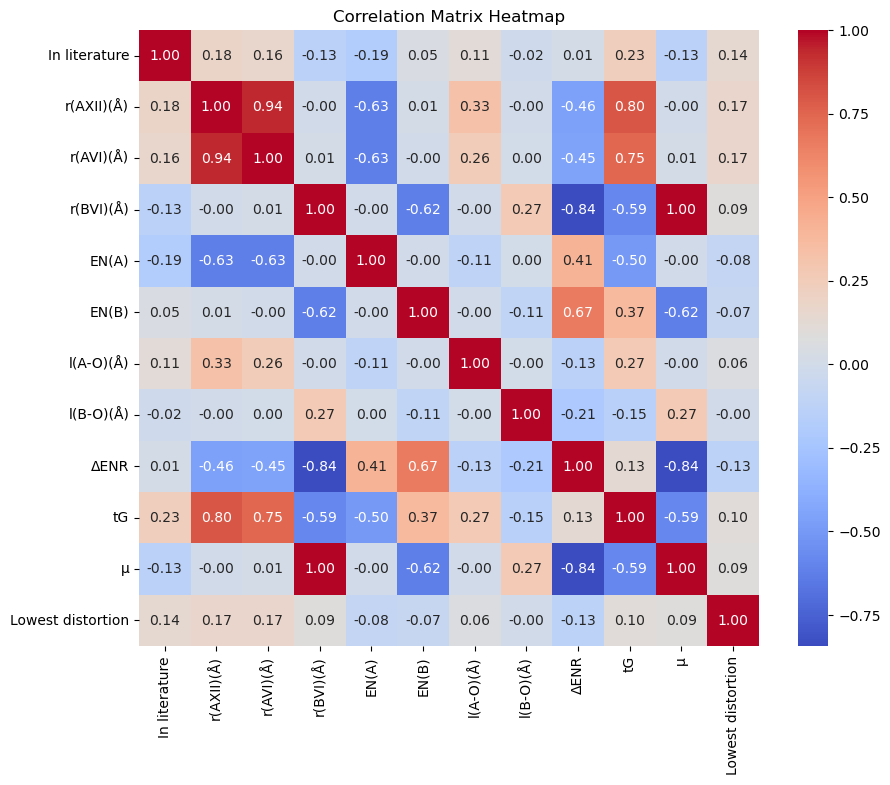

In [64]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

In [65]:
X = (X - X.mean())/X.std()

#(ii) Split the dataset into training and test data. Further split your training
# data into validation data which will help you while tuning your
# hyperparameters.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2,random_state=42)

X_train = X_train.astype('float32')
X_val = X_val.astype('float32')
X_test = X_test.astype('float32')

y_train = to_categorical(y_train)
y_val = to_categorical(y_val)
y_test = to_categorical(y_test)
y_train = tf.convert_to_tensor(y_train)
y_val = tf.convert_to_tensor(y_val)
y_test = tf.convert_to_tensor(y_test)

[0 1 0 ... 0 1 0]
(3376,)
Epoch 1/4
68/68 - 1s - loss: 1.0154 - accuracy: 0.5886 - val_loss: 0.9327 - val_accuracy: 0.5972 - 719ms/epoch - 11ms/step
Epoch 2/4
68/68 - 0s - loss: 0.9061 - accuracy: 0.6357 - val_loss: 0.9097 - val_accuracy: 0.6173 - 163ms/epoch - 2ms/step
Epoch 3/4
68/68 - 0s - loss: 0.8700 - accuracy: 0.6407 - val_loss: 0.8919 - val_accuracy: 0.6220 - 149ms/epoch - 2ms/step
Epoch 4/4
68/68 - 0s - loss: 0.8567 - accuracy: 0.6496 - val_loss: 0.8853 - val_accuracy: 0.6232 - 138ms/epoch - 2ms/step
33/33 - 0s - loss: 0.8479 - accuracy: 0.6487 - 47ms/epoch - 1ms/step
Test Accuracy: 64.86742496490479 %


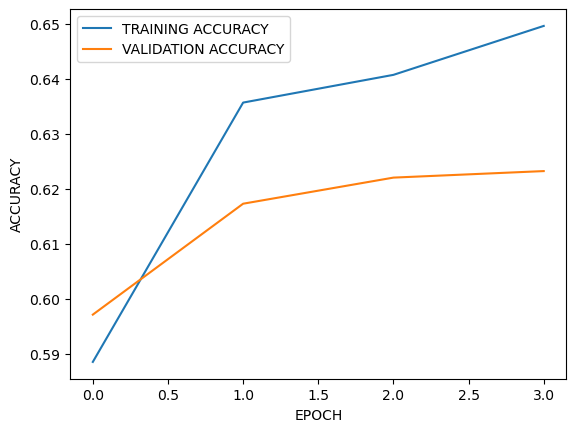

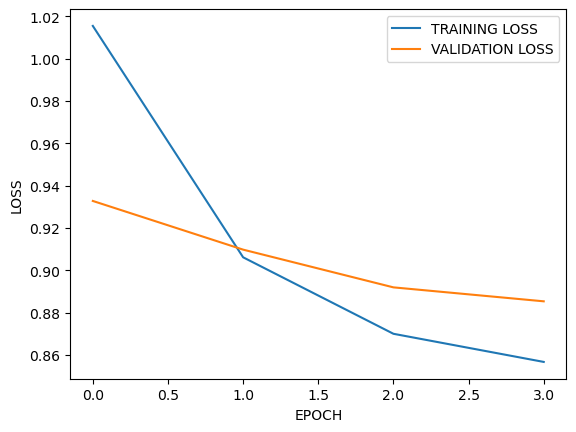

In [74]:
# (iii) Build a deep neural network. You will have to decide on how many
# layers and how many neurons in each layer you have to keep as these
# are hyperparameters. You can also experiment with different activation
# functions in each layer. Also, apply Dropout regularisation to your model.

#(a)Stochastic Gradient Descent
num_classes = 4

# Define the model
model1 = Sequential()

# Input layer
model1.add(Dense(units=32, input_dim=X_train.shape[1], activation='relu'))
model1.add(Dropout(0.5))  

# Hidden layers
model1.add(Dense(64, activation='relu'))
model1.add(Dropout(0.5))

model1.add(Dense(128, activation='relu'))
model1.add(Dropout(0.5))

#Output layer
model1.add(Dense(num_classes, activation='softmax'))


# Convert one-hot encoded labels to categorical labels
y_train_categorical = np.argmax(y_train, axis=1)

# Ensure y_train_categorical is 1D array
print(y_train_categorical)
print(y_train_categorical.shape)

# Compile the model with SGD optimizer
sgd = tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9, nesterov=True)
model1.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy'])
# training
history = model1.fit(X_train, y_train, epochs=4, batch_size=50, validation_data=(X_val, y_val), verbose=2)

# Evaluation
test_loss, test_acc = model1.evaluate(X_test, y_test, verbose=2)
print(f"Test Accuracy: {test_acc*100} %")

# Plotting
plt.plot(history.history['accuracy'], label='TRAINING ACCURACY')
plt.plot(history.history['val_accuracy'], label='VALIDATION ACCURACY')
plt.xlabel('EPOCH')
plt.ylabel('ACCURACY')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='TRAINING LOSS')
plt.plot(history.history['val_loss'], label='VALIDATION LOSS')
plt.xlabel('EPOCH')
plt.ylabel('LOSS')
plt.legend()
plt.show()

[0 1 0 ... 0 1 0]
(3376,)
Epoch 1/4
68/68 - 1s - loss: 1.0416 - accuracy: 0.5826 - val_loss: 0.9411 - val_accuracy: 0.6149 - 752ms/epoch - 11ms/step
Epoch 2/4
68/68 - 0s - loss: 0.9445 - accuracy: 0.6188 - val_loss: 0.9222 - val_accuracy: 0.6363 - 148ms/epoch - 2ms/step
Epoch 3/4
68/68 - 0s - loss: 0.9073 - accuracy: 0.6392 - val_loss: 0.8949 - val_accuracy: 0.6410 - 113ms/epoch - 2ms/step
Epoch 4/4
68/68 - 0s - loss: 0.8864 - accuracy: 0.6401 - val_loss: 0.8853 - val_accuracy: 0.6493 - 114ms/epoch - 2ms/step
33/33 - 0s - loss: 0.8570 - accuracy: 0.6562 - 36ms/epoch - 1ms/step
Test Accuracy: 65.625 %


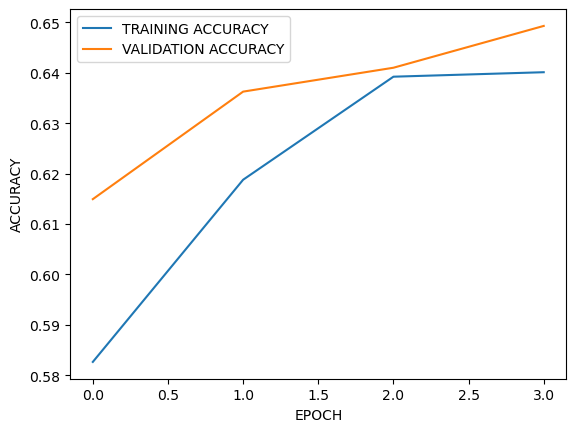

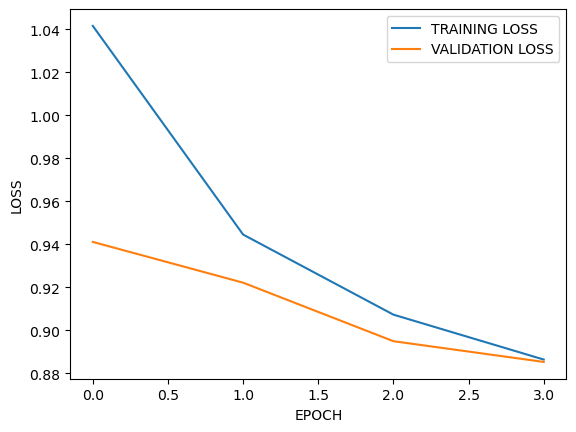

In [78]:
#(b)RMSProp
num_classes = 4

# Define the model
model2 = Sequential()

# Input layer
model2.add(Dense(units=32, input_dim=X_train.shape[1], activation='relu'))
model2.add(Dropout(0.5))  

# Hidden layers
model2.add(Dense(64, activation='relu'))
model2.add(Dropout(0.5))

model2.add(Dense(128, activation='relu'))
model2.add(Dropout(0.5))

#Output layer
model2.add(Dense(num_classes, activation='softmax'))


# Convert one-hot encoded labels to categorical labels
y_train_categorical = np.argmax(y_train, axis=1)

# Ensure y_train_categorical is 1D array
print(y_train_categorical)
print(y_train_categorical.shape)

# Compile the model with rms prop optimizer
rmsprop = RMSprop(learning_rate=0.001, rho=0.9)
model2.compile(optimizer=rmsprop, loss='categorical_crossentropy', metrics=['accuracy'])
# training
history = model2.fit(X_train, y_train, epochs=4, batch_size=50, validation_data=(X_val, y_val), verbose=2)

# Evaluation
test_loss, test_acc = model2.evaluate(X_test, y_test, verbose=2)
print(f"Test Accuracy: {test_acc*100} %")

# Plotting
plt.plot(history.history['accuracy'], label='TRAINING ACCURACY')
plt.plot(history.history['val_accuracy'], label='VALIDATION ACCURACY')
plt.xlabel('EPOCH')
plt.ylabel('ACCURACY')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='TRAINING LOSS')
plt.plot(history.history['val_loss'], label='VALIDATION LOSS')
plt.xlabel('EPOCH')
plt.ylabel('LOSS')
plt.legend()
plt.show()

[0 1 0 ... 0 1 0]
(3376,)
Epoch 1/4
68/68 - 1s - loss: 1.0216 - accuracy: 0.5883 - val_loss: 0.9295 - val_accuracy: 0.6149 - 838ms/epoch - 12ms/step
Epoch 2/4
68/68 - 0s - loss: 0.9317 - accuracy: 0.6241 - val_loss: 0.9018 - val_accuracy: 0.6220 - 154ms/epoch - 2ms/step
Epoch 3/4
68/68 - 0s - loss: 0.8980 - accuracy: 0.6348 - val_loss: 0.8889 - val_accuracy: 0.6197 - 122ms/epoch - 2ms/step
Epoch 4/4
68/68 - 0s - loss: 0.8825 - accuracy: 0.6374 - val_loss: 0.8767 - val_accuracy: 0.6197 - 112ms/epoch - 2ms/step
33/33 - 0s - loss: 0.8450 - accuracy: 0.6487 - 41ms/epoch - 1ms/step
Test Accuracy: 64.86742496490479 %


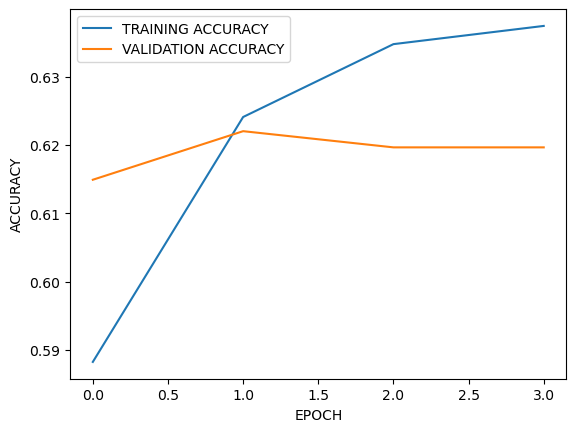

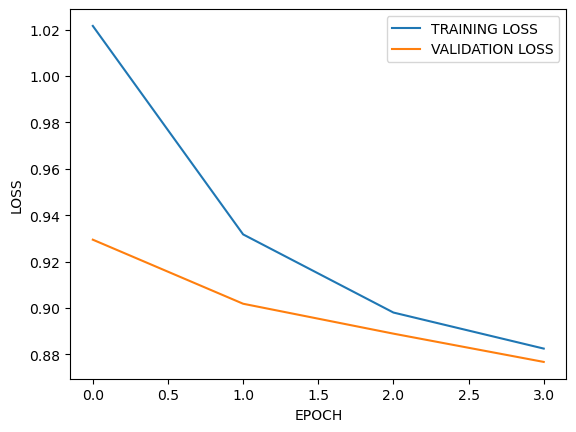

In [79]:
#(c)AdaDelta
num_classes = 4

# Define the model
model3 = Sequential()

# Input layer
model3.add(Dense(units=32, input_dim=X_train.shape[1], activation='relu'))
model3.add(Dropout(0.5))  

# Hidden layers
model3.add(Dense(64, activation='relu'))
model3.add(Dropout(0.5))

model3.add(Dense(128, activation='relu'))
model3.add(Dropout(0.5))

#Output layer
model3.add(Dense(num_classes, activation='softmax'))


# Convert one-hot encoded labels to categorical labels
y_train_categorical = np.argmax(y_train, axis=1)

# Ensure y_train_categorical is 1D array
print(y_train_categorical)
print(y_train_categorical.shape)

# Compile the model with adadelta optimizer
adadelta = Adadelta(learning_rate=1.0, rho=0.95)
model3.compile(optimizer=adadelta, loss='categorical_crossentropy', metrics=['accuracy'])
# training
history = model3.fit(X_train, y_train, epochs=4, batch_size=50, validation_data=(X_val, y_val), verbose=2)

# Evaluation
test_loss, test_acc = model3.evaluate(X_test, y_test, verbose=2)
print(f"Test Accuracy: {test_acc*100} %")

# Plotting
plt.plot(history.history['accuracy'], label='TRAINING ACCURACY')
plt.plot(history.history['val_accuracy'], label='VALIDATION ACCURACY')
plt.xlabel('EPOCH')
plt.ylabel('ACCURACY')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='TRAINING LOSS')
plt.plot(history.history['val_loss'], label='VALIDATION LOSS')
plt.xlabel('EPOCH')
plt.ylabel('LOSS')
plt.legend()
plt.show()


[0 1 0 ... 0 1 0]
(3376,)
Epoch 1/4
68/68 - 1s - loss: 1.0891 - accuracy: 0.5702 - val_loss: 0.9718 - val_accuracy: 0.6185 - 786ms/epoch - 12ms/step
Epoch 2/4
68/68 - 0s - loss: 0.9487 - accuracy: 0.6268 - val_loss: 0.9088 - val_accuracy: 0.6327 - 115ms/epoch - 2ms/step
Epoch 3/4
68/68 - 0s - loss: 0.9065 - accuracy: 0.6277 - val_loss: 0.8875 - val_accuracy: 0.6339 - 123ms/epoch - 2ms/step
Epoch 4/4
68/68 - 0s - loss: 0.8811 - accuracy: 0.6321 - val_loss: 0.8794 - val_accuracy: 0.6363 - 120ms/epoch - 2ms/step
33/33 - 0s - loss: 0.8577 - accuracy: 0.6676 - 39ms/epoch - 1ms/step
Test Accuracy: 66.76136255264282 %


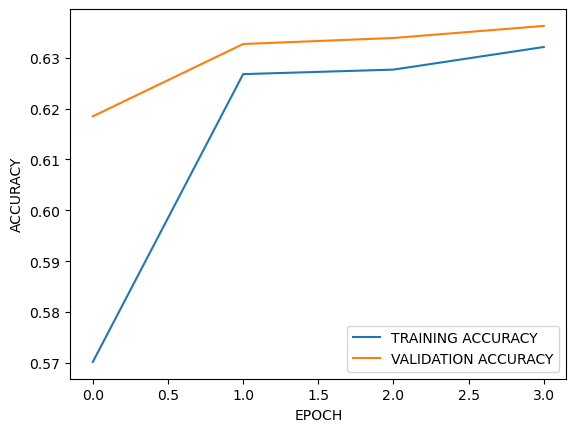

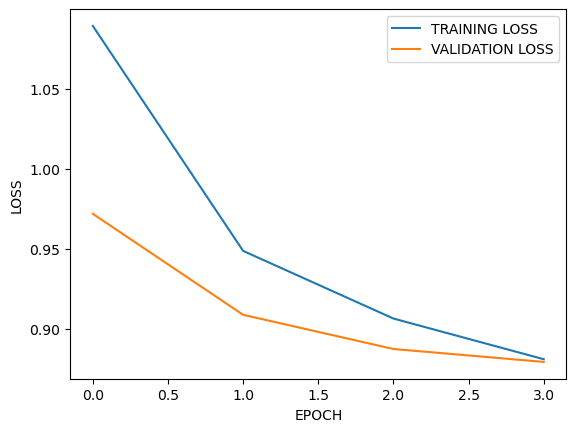

In [84]:
#(d)Adam
num_classes = 4

# Define the model
model4 = Sequential()

# Input layer
model4.add(Dense(units=32, input_dim=X_train.shape[1], activation='relu'))
model4.add(Dropout(0.5))  

# Hidden layers
model4.add(Dense(64, activation='relu'))
model4.add(Dropout(0.5))

model4.add(Dense(128, activation='relu'))
model4.add(Dropout(0.5))

#Output layer
model4.add(Dense(num_classes, activation='softmax'))


# Convert one-hot encoded labels to categorical labels
y_train_categorical = np.argmax(y_train, axis=1)

# Ensure y_train_categorical is 1D array
print(y_train_categorical)
print(y_train_categorical.shape)

# Compile the model with adam optimizer
adam = Adam(learning_rate=0.001)
model4.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'])
# training
history = model4.fit(X_train, y_train, epochs=4, batch_size=50, validation_data=(X_val, y_val), verbose=2)

# Evaluation
test_loss, test_acc = model4.evaluate(X_test, y_test, verbose=2)
print(f"Test Accuracy: {test_acc*100} %")

# Plotting
plt.plot(history.history['accuracy'], label='TRAINING ACCURACY')
plt.plot(history.history['val_accuracy'], label='VALIDATION ACCURACY')
plt.xlabel('EPOCH')
plt.ylabel('ACCURACY')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='TRAINING LOSS')
plt.plot(history.history['val_loss'], label='VALIDATION LOSS')
plt.xlabel('EPOCH')
plt.ylabel('LOSS')
plt.legend()
plt.show()


In [ ]:
#I get maximum accuracy with adam optimizer.